In [1]:
#Question:1
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
df = pd.read_csv('NDAP_REPORT_7004.csv')


In [2]:
#Question:2
count_row = df.shape[0]  # Number of rows
count_col = df.shape[1]  # Number of columns
print('Number of Columns: '+str(count_col))
print('Number of Rows: '+str(count_row))

Number of Columns: 19
Number of Rows: 1473


In [3]:
#Question:3
for col in df:   #This loop prints Unique Values in Each Column
    print(df[col].unique()) 

[   1    2    3 ... 1471 1472 1473]
['India']
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 15 14 16 17 18 21 22 19 20 23 24
 27 28 29 30 31 32 33 34 35 36 37 38]
['Jammu And Kashmir' 'Himachal Pradesh' 'Punjab' 'Chandigarh'
 'Uttarakhand' 'Haryana' 'Delhi' 'Rajasthan' 'Uttar Pradesh' 'Bihar'
 'Sikkim' 'Arunachal Pradesh' 'Nagaland' 'Mizoram' 'Manipur' 'Tripura'
 'Meghalaya' 'Assam' 'Odisha' 'Chhattisgarh' 'West Bengal' 'Jharkhand'
 'Madhya Pradesh' 'Gujarat' 'Maharashtra' 'Andhra Pradesh' 'Karnataka'
 'Goa' 'Lakshadweep' 'Kerala' 'Tamil Nadu' 'Puducherry'
 'Andaman And Nicobar Islands' 'Telangana' 'Ladakh'
 'The Dadra And Nagar Haveli And Daman And Diu']
[     1      2      3      4      5      7      8     10     11     12
     13     14    620    621    622    623    624    625    626    627
     15     16     17     18     19     20     21     22     23     24
     25     26     27     28     29     30     31     32     33     34
     35     36     37     38     39     40     41     42  

In [4]:
#Question:3
n=df.nunique(axis=0) # To print number of Unique Values in each column (axis=0)
print(n)

Rowid                                                                                        1473
Country                                                                                         1
State lgd code                                                                                 36
State                                                                                          36
District lgd code                                                                             737
District                                                                                      732
Year                                                                                            1
Type of residence namely rural or urban                                                         2
Number of census houses                                                                      1438
Houses having grass or thatch or bamboo etc. as material of wall                             1365
Houses having plasti

In [5]:
#Question:4
print(df.dtypes) #dtypes command returns the data type of column of dataframe


'''The following Columns contain some erroneous values
1.Number of census houses: object
2.Houses having grass or thatch or bamboo etc. as material of wall: object
3.Houses having plastic or polythene as material of wall: object
These columns by common knowledge and with respect to context of data set should contain
Floating Point values as they represent quantity of houses having a particular characteristic.
So they to be cleaned first
'''

Rowid                                                                                          int64
Country                                                                                       object
State lgd code                                                                                 int64
State                                                                                         object
District lgd code                                                                              int64
District                                                                                      object
Year                                                                                           int64
Type of residence namely rural or urban                                                       object
Number of census houses                                                                       object
Houses having grass or thatch or bamboo etc. as material of wall                           

'The following Columns contain some erroneous values\n1.Number of census houses: object\n2.Houses having grass or thatch or bamboo etc. as material of wall: object\n3.Houses having plastic or polythene as material of wall: object\nThese columns by common knowledge and with respect to context of data set should contain\nFloating Point values as they represent quantity of houses having a particular characteristic.\nSo they to be cleaned first\n'

In [6]:
#Question:4
df.isnull().sum() 
# is.null() returns the null values
# is.null().sum() returns the number of null values of each column



Rowid                                                                                        0
Country                                                                                      0
State lgd code                                                                               0
State                                                                                        0
District lgd code                                                                            0
District                                                                                     0
Year                                                                                         0
Type of residence namely rural or urban                                                      0
Number of census houses                                                                      5
Houses having grass or thatch or bamboo etc. as material of wall                             5
Houses having plastic or polythene as material of 

In [7]:
#Question:4
df.isnull().sum().sum()
# is.null().sum().sum() returns the sum of null values in the entire dataset

55

In [8]:
cd=df.dropna() #To drop the rows with NaN values
cd

,Rowid,Country,State lgd code,State,District lgd code,District,Year,Type of residence namely rural or urban,Number of census houses,Houses having grass or thatch or bamboo etc. as material of wall,Houses having plastic or polythene as material of wall,Houses having mud or unburnt brick as material of wall,Houses having wood as material of wall,Houses having stone not packed with mortar as material of wall,Houses having stone packed with mortar as material of wall,Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall,Houses having burnt brick as material of wall,Houses having concrete as material of wall,Houses having any other material of wall
0,1,India,1,Jammu And Kashmir,1,Anantnag,2011,Rural,109465,270,1331,22710.000000,3014.00000,3034.000000,480.000000,229.000000,76229.00000,1400.000000,768.000000
1,2,India,1,Jammu And Kashmir,1,Anantnag,2011,Urban,33522,69,121,6807.000000,123.00000,268.000000,93.000000,98.000000,23789.00000,1894.000000,260.000000
2,3,India,1,Jammu And Kashmir,2,Budgam,2011,Rural,85561.57321,134.1822704,168.9702664,7174.278724,960.14869,748.438886,306.134365,214.691633,73342.04111,1013.821599,1498.865657
3,4,India,1,Jammu And Kashmir,2,Budgam,2011,Urban,13136,49,27,935.000000,24.00000,187.000000,30.000000,39.000000,11297.00000,454.000000,94.000000
4,5,India,1,Jammu And Kashmir,3,Baramulla,2011,Rural,120312.4268,410.8177296,173.0297336,19207.721280,3227.85131,12552.561110,5479.865635,1740.308367,72686.95889,2118.178401,2715.134343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,1469,India,38,The Dadra And Nagar Haveli And Daman And Diu,463,Daman,2011,Urban,42352,202,150,426.000000,95.00000,72.000000,185.000000,130.000000,39160.00000,1927.000000,5.000000
1469,1470,India,38,The Dadra And Nagar Haveli And Daman And Diu,464,Diu,2011,Rural,5410,6,0,50.000000,2.00000,238.000000,5094.000000,0.000000,2.00000,5.000000,13.000000
1470,1471,India,38,The Dadra And Nagar Haveli And Daman And Diu,464,Diu,2011,Urban,5279,11,1,6.000000,0.00000,165.000000,4820.000000,11.000000,147.00000,116.000000,2.000000
1471,1472,India,38,The Dadra And Nagar Haveli And Daman And Diu,465,Dadra And Nagar Haveli,2011,Rural,35408,16428,62,4939.000000,145.00000,113.000000,74.000000,96.000000,12642.00000,897.000000,12.000000


In [9]:
#missdf is the dataframe to store the num of missing values returned by "isnull().sum()" in ascending order
missdf=pd.DataFrame({'': df.isnull().sum()}).sort_values(by='', ascending=True) 

missdf


,
Rowid,0
Country,0
State lgd code,0
State,0
District lgd code,0
District,0
Year,0
Type of residence namely rural or urban,0
Houses having burnt brick as material of wall,5
Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall,5


In [10]:
df.duplicated().sum().sum()
#To check for any duplicated values in dataset
#duplicated().sum() returns number of duplicated values in dataset 

0

In [11]:
df.isnull().sum(axis=1)
#It returns the number of missing values Row-wise(axis=1)


0       0
1       0
2       0
3       0
4       0
       ..
1468    0
1469    0
1470    0
1471    0
1472    0
Length: 1473, dtype: int64

In [12]:
df.isnull().sum(axis=1).sum()
#It returns the sum of missing values across all Rows
#It is same as sum of missing values across columns

55

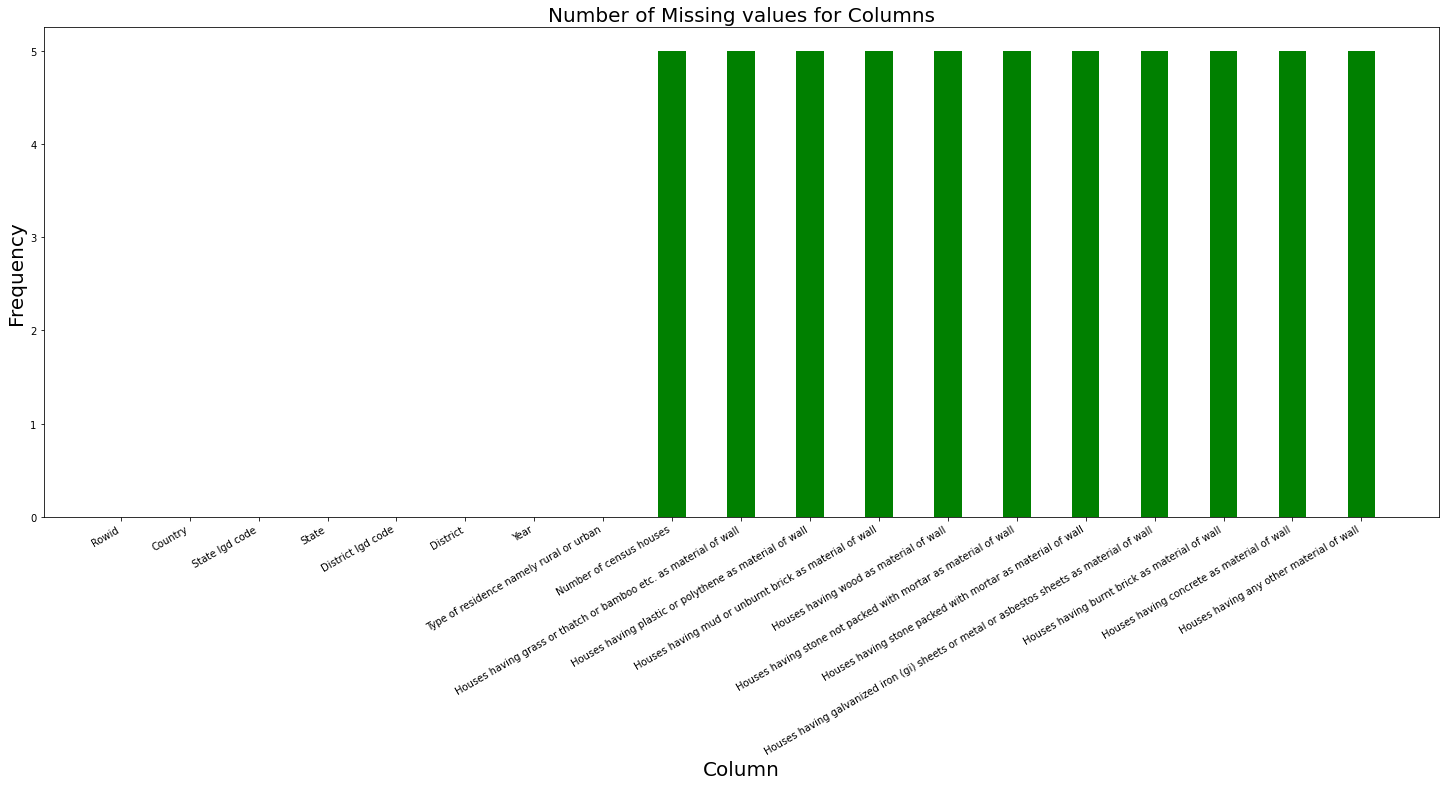

In [13]:
#Question 5:

#Graph which represents Frequency of missing values row-wise
columns=list((df.isnull().sum()).keys())                    #Storing Column No. of Original Dataframe as list(columns)
row=list((df.isnull().sum()))                               #Storing Values of columns of Original Dataframe as list(row))
fig = plt.figure(figsize =(25, 10))
plt.bar(columns,row,color='green',width =0.4)
plt.xlabel('Column',fontsize=20)                             #To set the font size and x-axis label for readability
plt.ylabel('Frequency',fontsize=20)                          #To set the font size and y-axis label for readability
plt.title('Number of Missing values for Columns',fontsize=20)#To set the font size for Title for readability                                   #To show the plot after adhering to commands mentioned above
fig.autofmt_xdate() #To rotate x-axis labels so that ticks are avoided
plt.show()

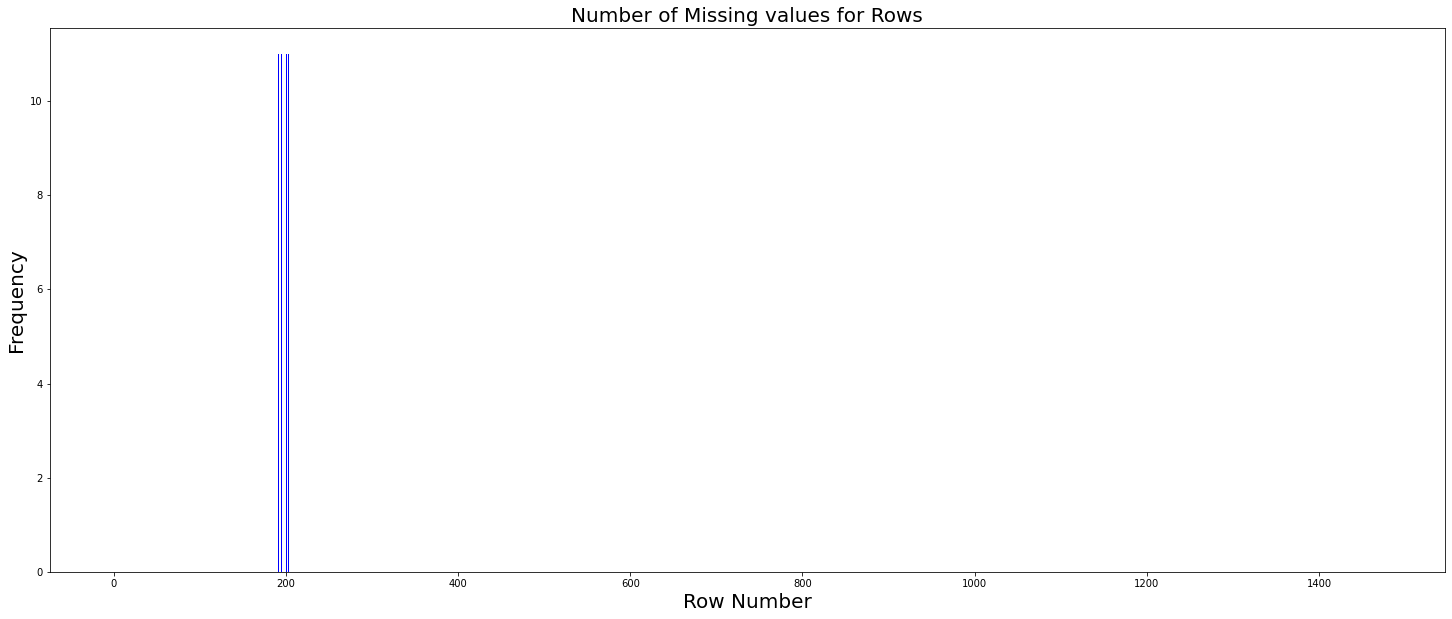

In [14]:
#Question 6:

#This Graph shows missing value Row wise across the rows
columns=list((df.isnull().sum(axis=1)).keys()) #Storing Column No. of Original Dataframe as list(columns)
row=list((df.isnull().sum(axis=1)))            #Storing Frequency of Original Dataframe Values as list(row)
fig = plt.figure(figsize =(25, 10))            #The figsize attribute is used to specify the width and height of the graph
plt.bar(columns,row,color='blue',width =1)
plt.xlabel('Row Number',fontsize=20)           #To set the font size and x-axis label for readability
plt.ylabel('Frequency',fontsize=20)            #To set the font size and y-axis label for readability
plt.title('Number of Missing values for Rows',fontsize=20) #To set the font size for Title for readability
plt.show()                                     #To show the plot after adhering to commands mentioned above


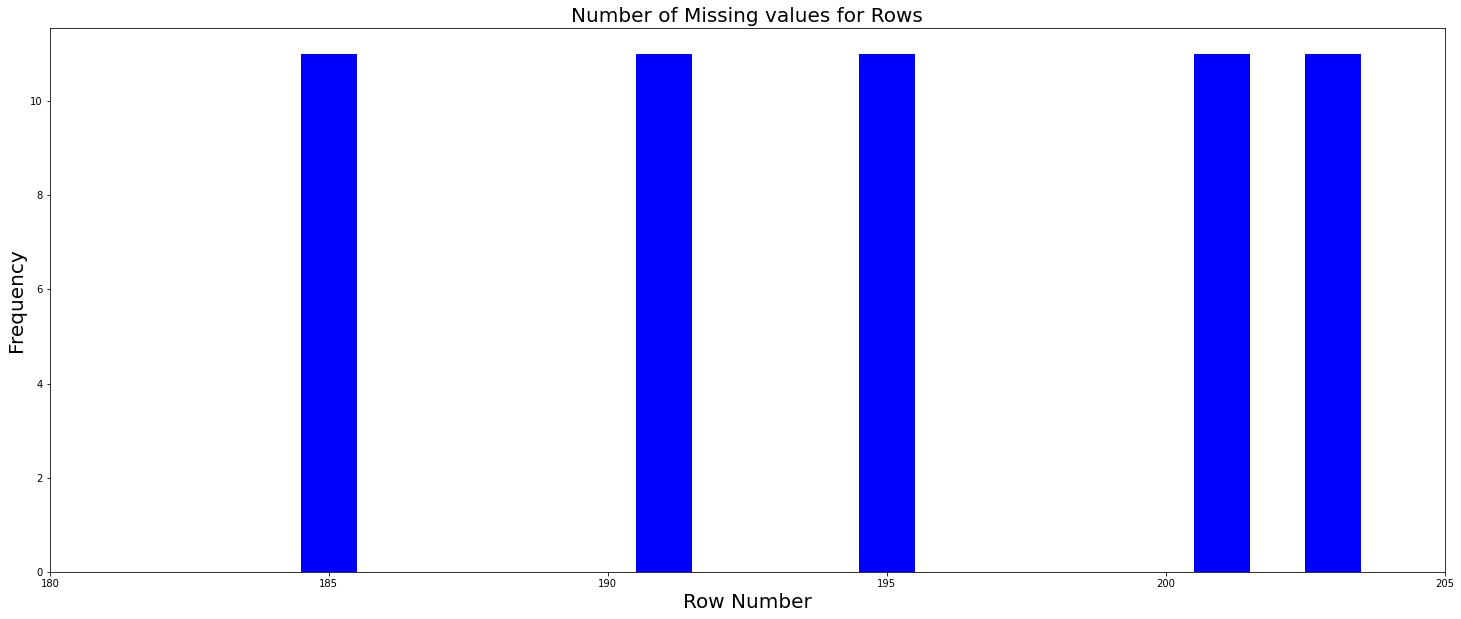

In [15]:
#This is the magnified portion in which limits of x-axis has been set from (180-205)
columns=list((df.isnull().sum(axis=1)).keys()) 
row=list((df.isnull().sum(axis=1)))           
fig = plt.figure(figsize =(25, 10))            
plt.bar(columns,row,color='blue',width =1)
plt.xlim(180,205)                              #Command to limit x-axis from (180-205)
plt.xlabel('Row Number',fontsize=20)           
plt.ylabel('Frequency',fontsize=20)           
plt.title('Number of Missing values for Rows',fontsize=20) 
plt.show()                                     

In [16]:
#Question 7:

#Attempt to clean the dataset
'''As per the analysis done for Question 3, We find that three columns
contain an error value 'zero' rather than float value (0.0)
 .replace(a,b) command will replace the 'a' from tha data set with value 'b' which we want to replace it with initially
'''
cd["Number of census houses"]= cd["Number of census houses"].replace("zero",float(0))
cd["Houses having grass or thatch or bamboo etc. as material of wall"]= cd["Houses having grass or thatch or bamboo etc. as material of wall"].replace("zero",float(0))
cd["Houses having plastic or polythene as material of wall"]= cd["Houses having plastic or polythene as material of wall"].replace("zero",float(0))
#.astype() command was used to convert the type of columns from 'str' to 'float'
cd['Number of census houses'] = cd['Number of census houses'].astype('float64')
cd['Houses having grass or thatch or bamboo etc. as material of wall'] = cd['Houses having grass or thatch or bamboo etc. as material of wall'].astype('float64')
cd['Houses having plastic or polythene as material of wall']=cd['Houses having plastic or polythene as material of wall'].astype('float64')
cd.dtypes

C:\Users\alauk\AppData\Local\Temp\ipykernel_19876\2550515457.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd["Number of census houses"]= cd["Number of census houses"].replace("zero",float(0))
C:\Users\alauk\AppData\Local\Temp\ipykernel_19876\2550515457.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd["Houses having grass or thatch or bamboo etc. as material of wall"]= cd["Houses having grass or thatch or bamboo etc. as material of wall"].replace("zero",float(0))
C:\Users\alauk\AppData\Local\Tem

Rowid                                                                                          int64
Country                                                                                       object
State lgd code                                                                                 int64
State                                                                                         object
District lgd code                                                                              int64
District                                                                                      object
Year                                                                                           int64
Type of residence namely rural or urban                                                       object
Number of census houses                                                                      float64
Houses having grass or thatch or bamboo etc. as material of wall                           

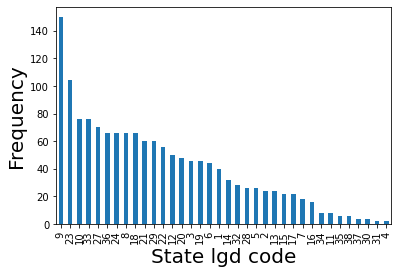

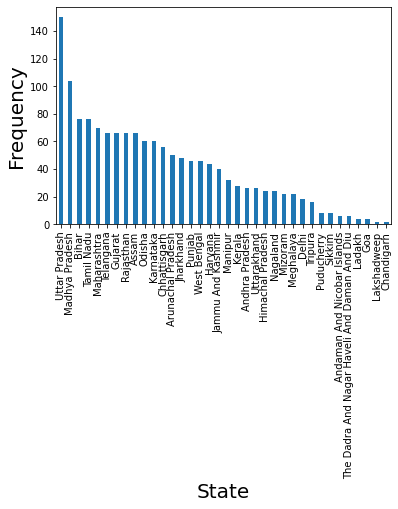

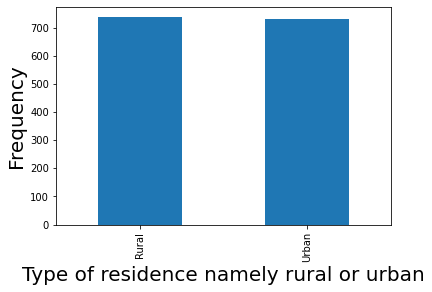

In [17]:
#Question 8:
'''
Graph for Discrete Variables:
  1.State LGD Code
  2.State
  3.Type of residence namely rural or urban
'''
cd2=cd.drop(cd.columns[0:2], axis=1)  #Creating a dataframe which consists of above required varibles
cd2=cd2.drop(cd2.columns[6:27],axis=1)

cd2['State lgd code'].value_counts().plot(kind='bar') #To draw Bar graph
plt.xlabel('State lgd code',fontsize=20) #To set labels and font sizes                          
plt.ylabel('Frequency',fontsize=20)                         
plt.show()

cd2['State'].value_counts().plot(kind='bar')
plt.xlabel('State',fontsize=20)                          
plt.ylabel('Frequency',fontsize=20)                         
plt.show()

cd2['Type of residence namely rural or urban'].value_counts().plot(kind='bar')
plt.xlabel('Type of residence namely rural or urban',fontsize=20)                          
plt.ylabel('Frequency',fontsize=20)                         
plt.show()

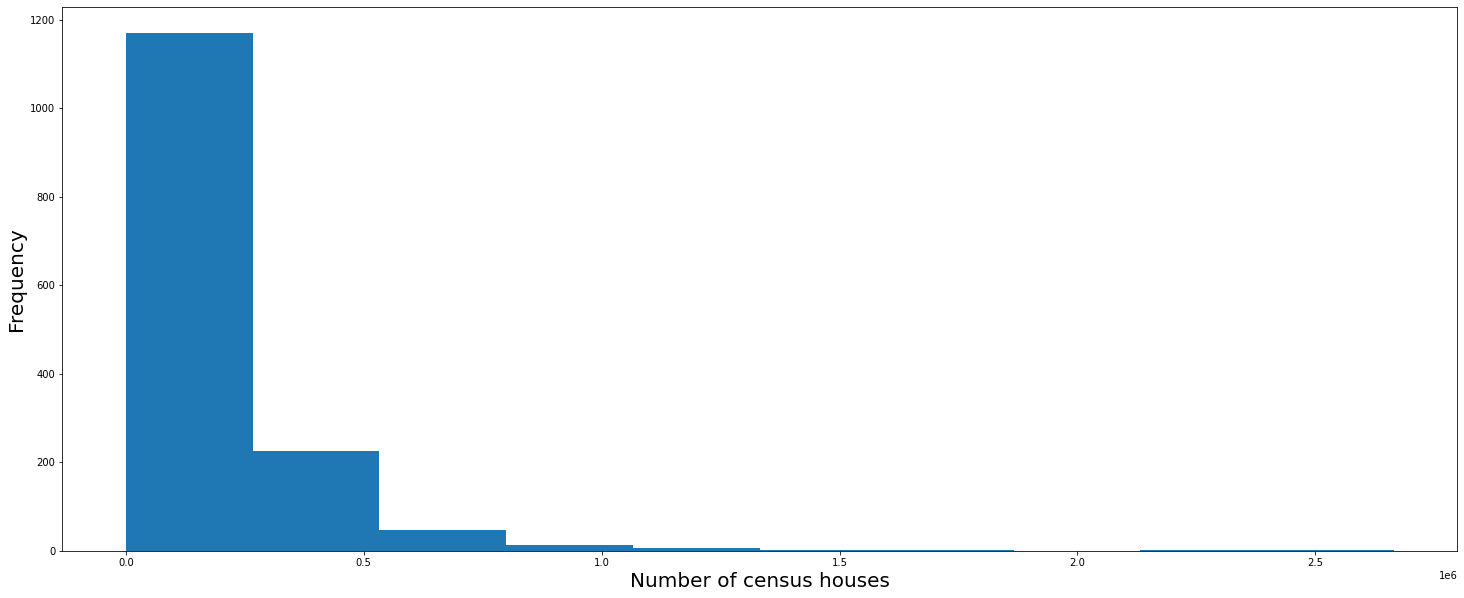

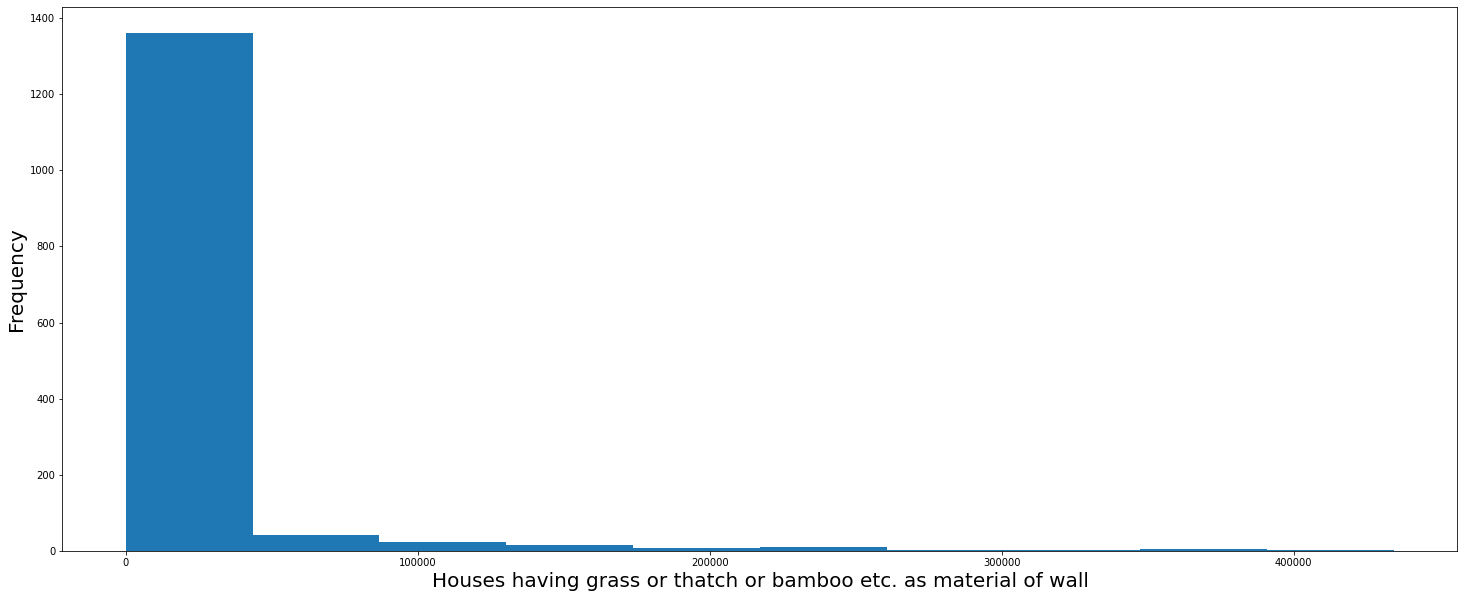

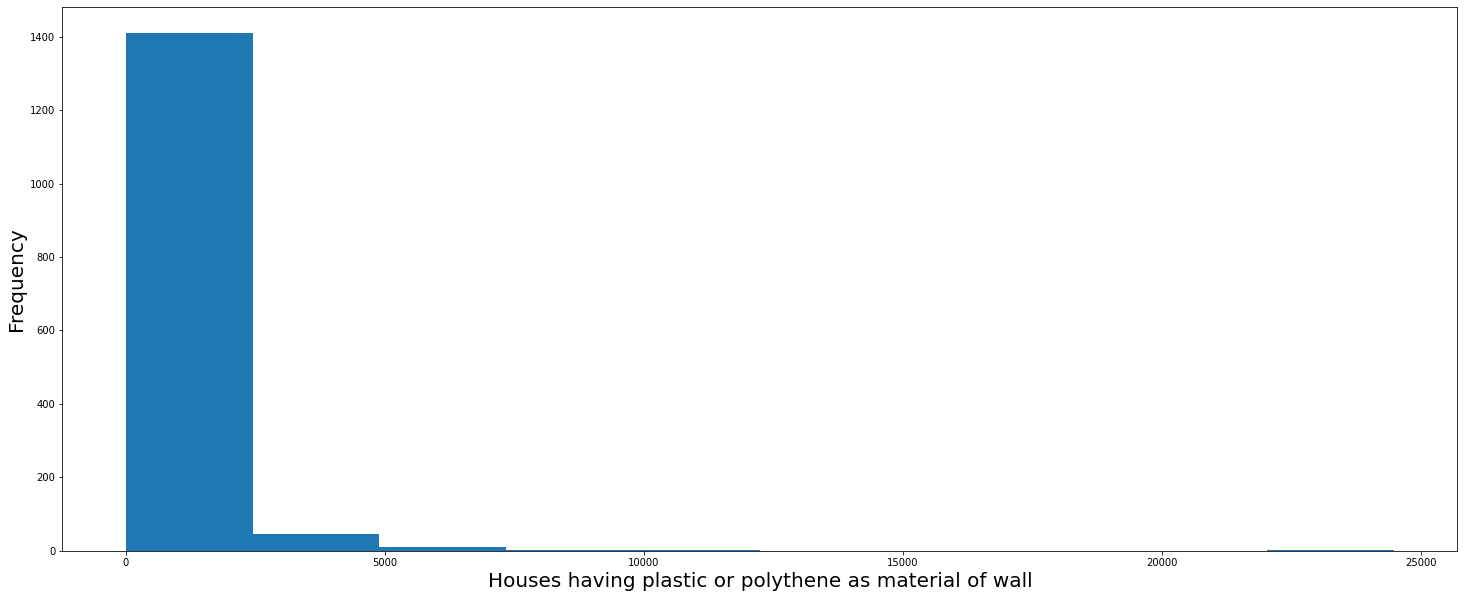

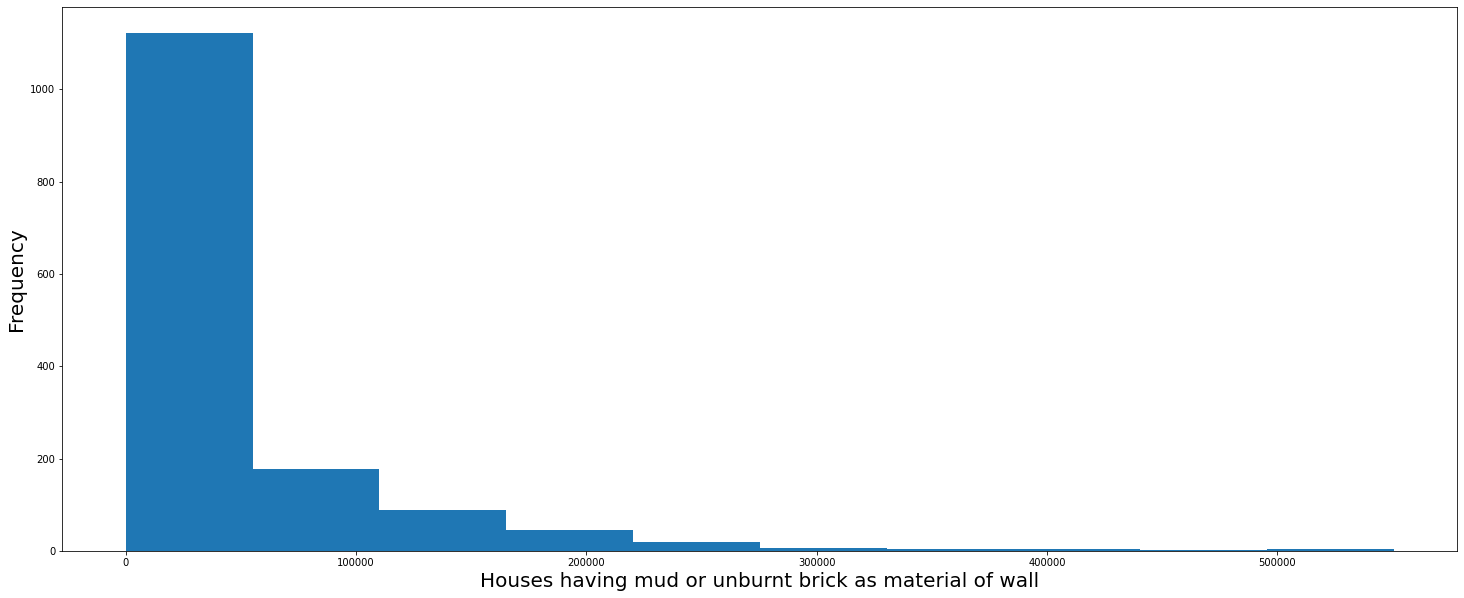

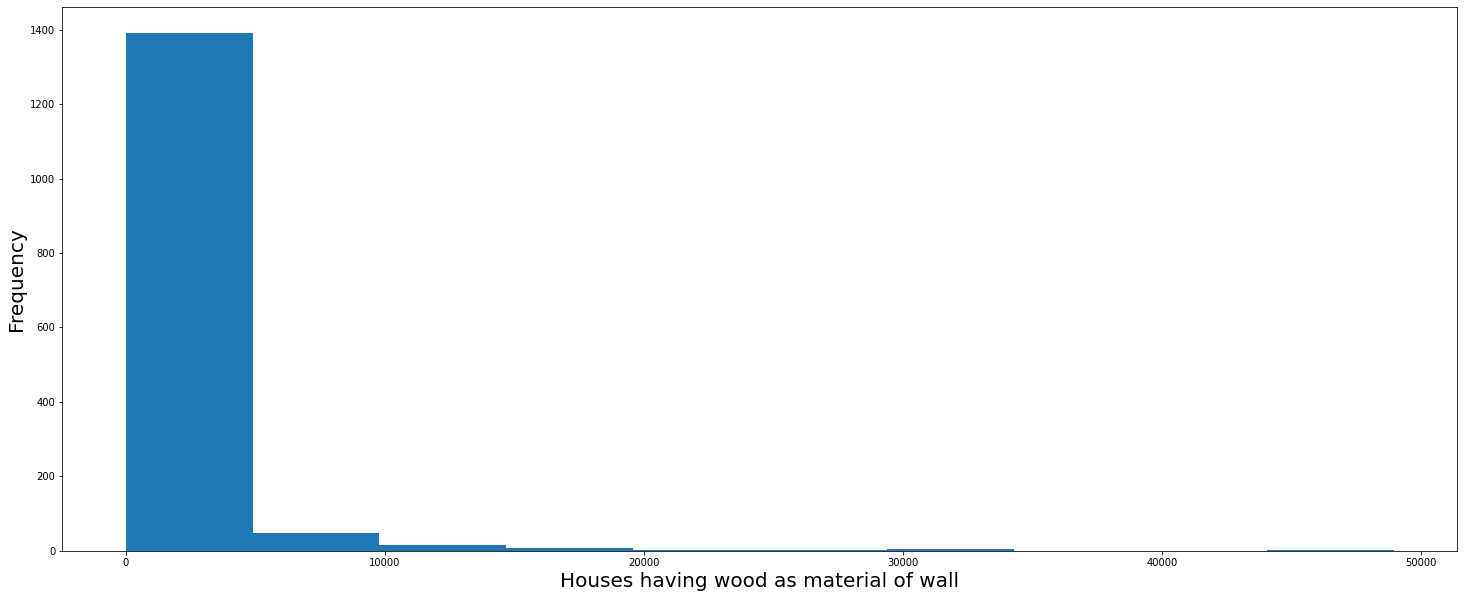

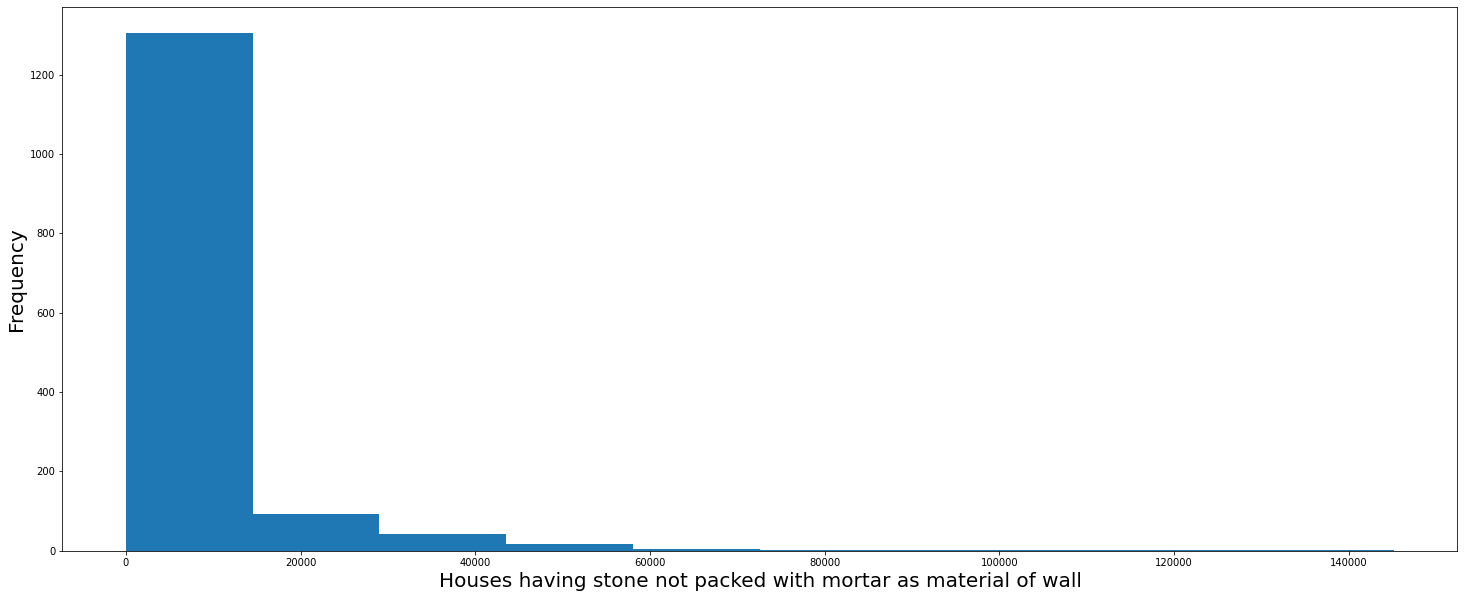

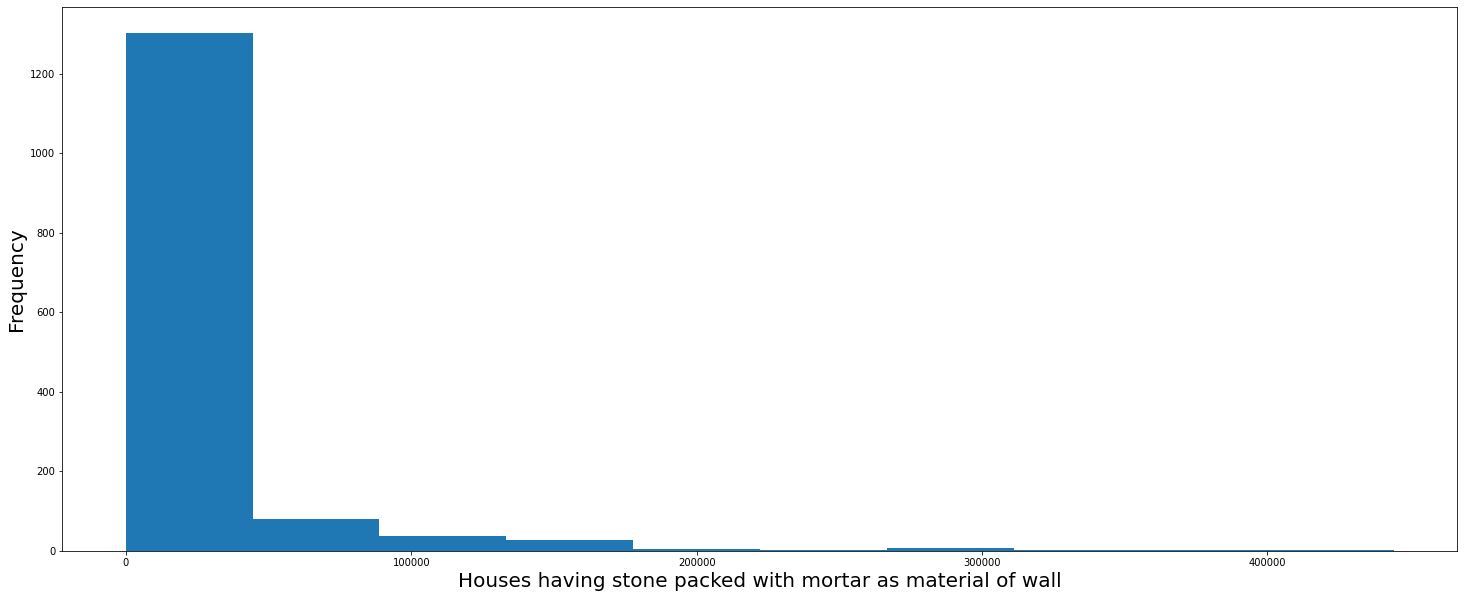

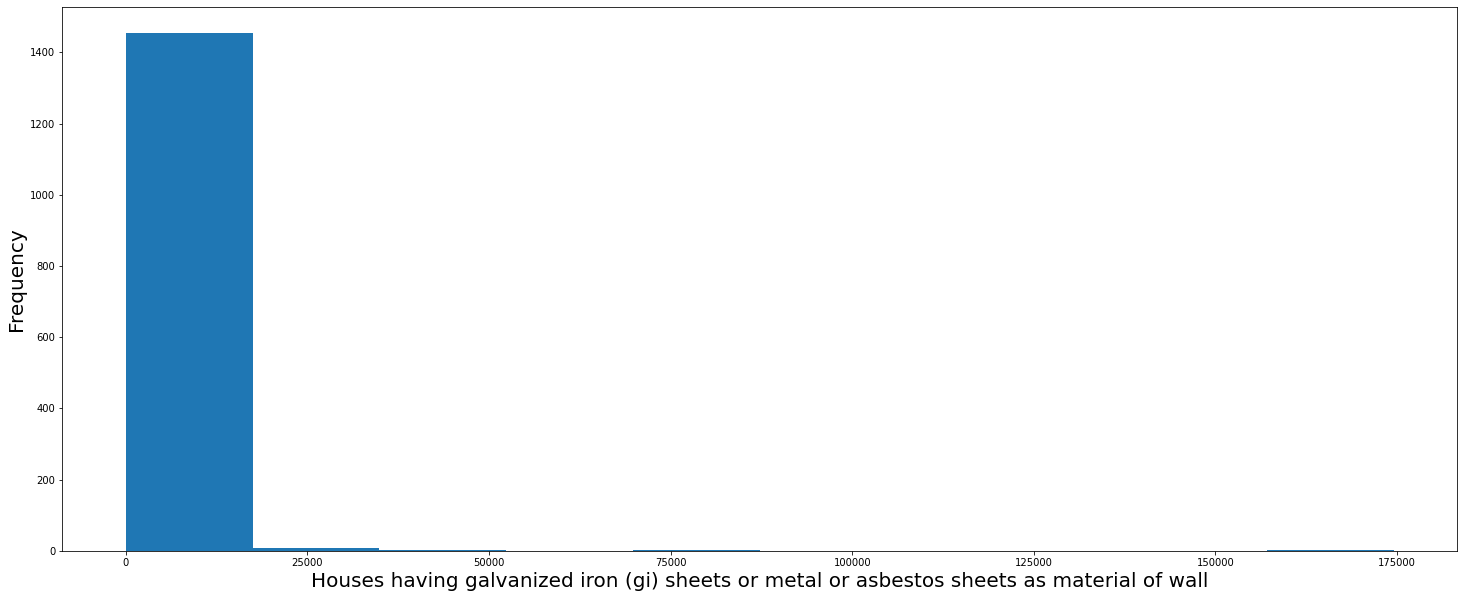

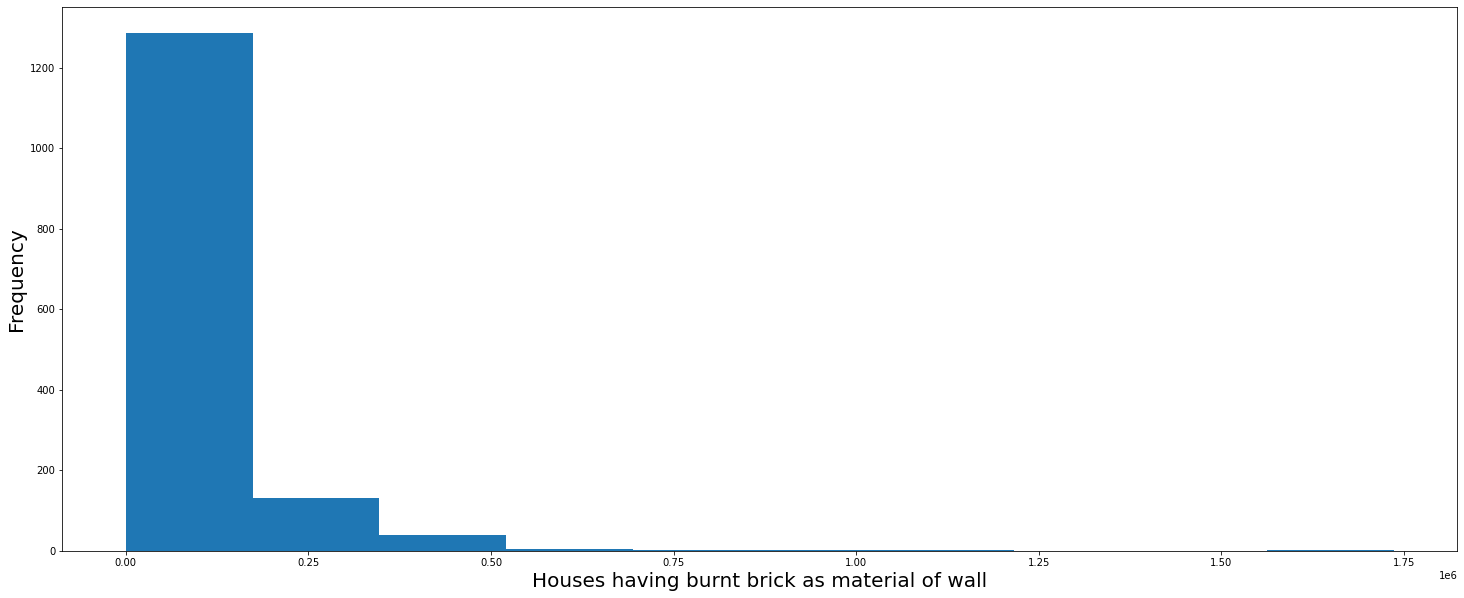

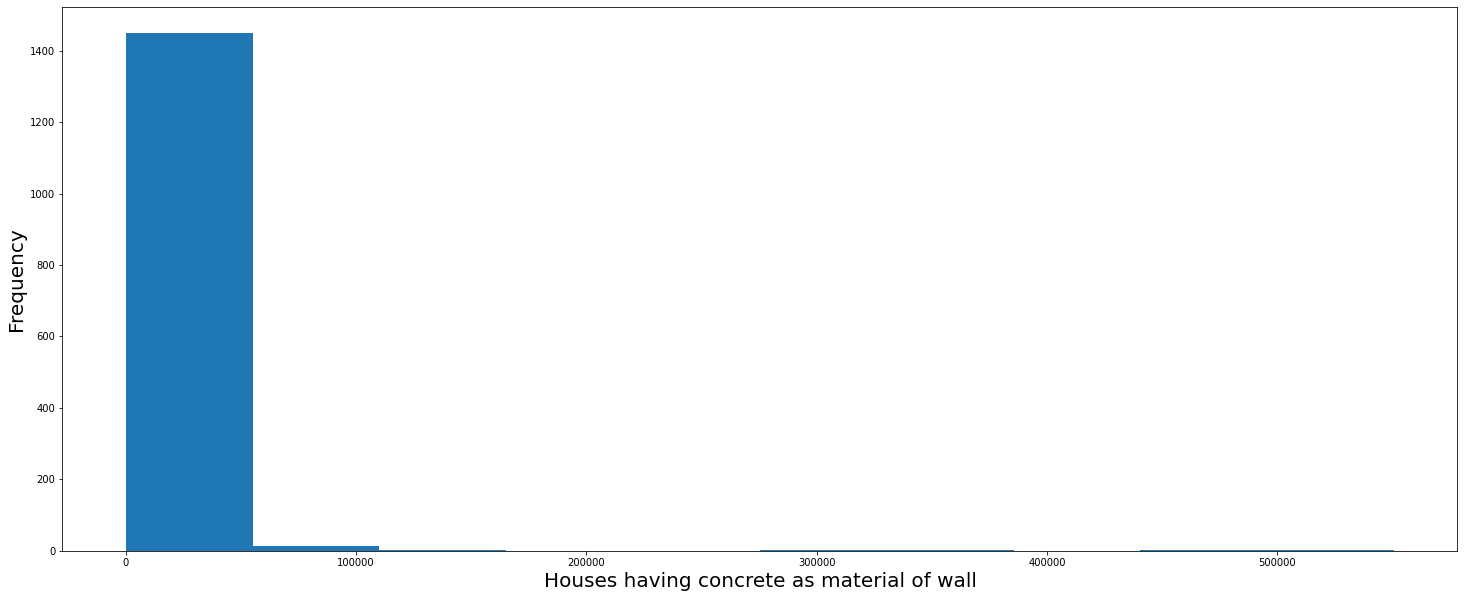

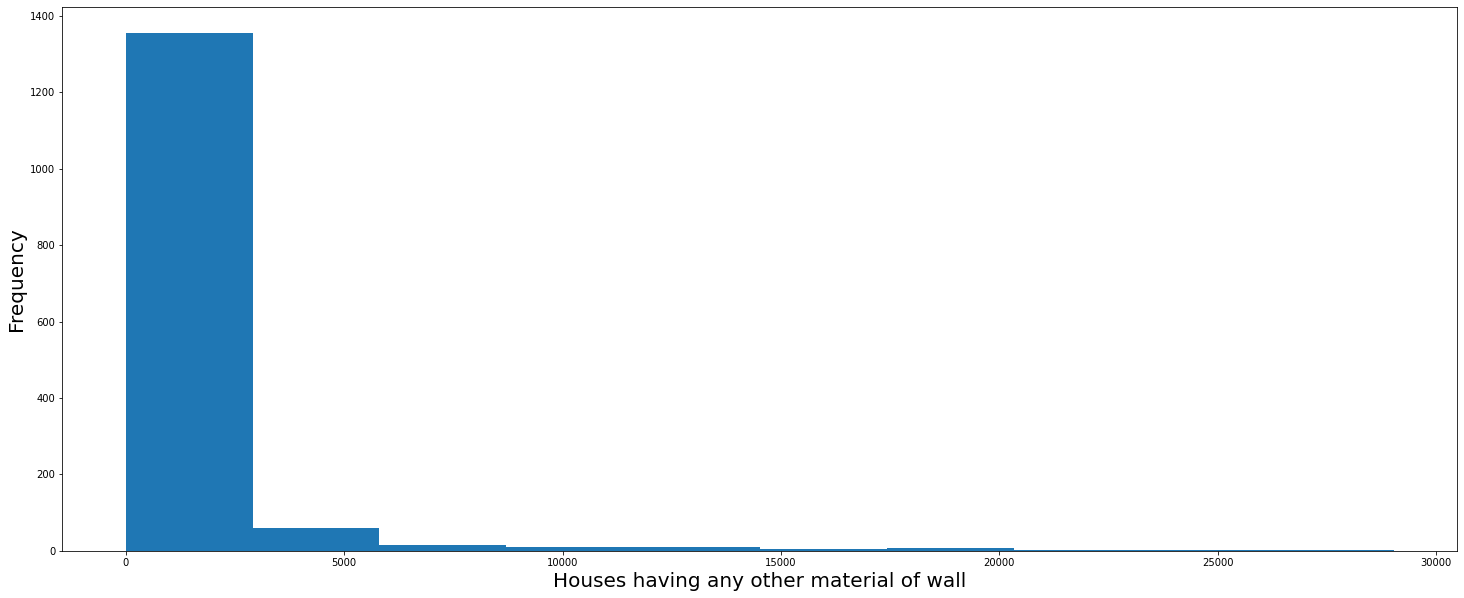

In [18]:
#Question 9:
'''
Graph for Continuous Variables:
All columns from Number of census houses till the last one are continuous variables
even though they seem discrete in mathematical sense but the values they have are 
very large and can be considered continuous in practical sense.
'''
cd6=cd.drop(cd.columns[:8], axis=1) #Getting a dataset of required columns and dropping unneccessary columns
cd6=cd6.drop(cd6.columns[11:], axis=1)
names=list(cd6.columns) #Making a list for storing column names

for i in range(len(names)):  
    if (cd6[names[i]].dtypes == 'float64'):  #The columns we require for histogram
        plt.figure(figsize=(25,10)) 
        plt.hist(cd6.iloc[:,i],bins=10) #Characterization of histogram
        plt.xlabel(names[i],fontsize=20)
        plt.ylabel('Frequency',fontsize=20)
        plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

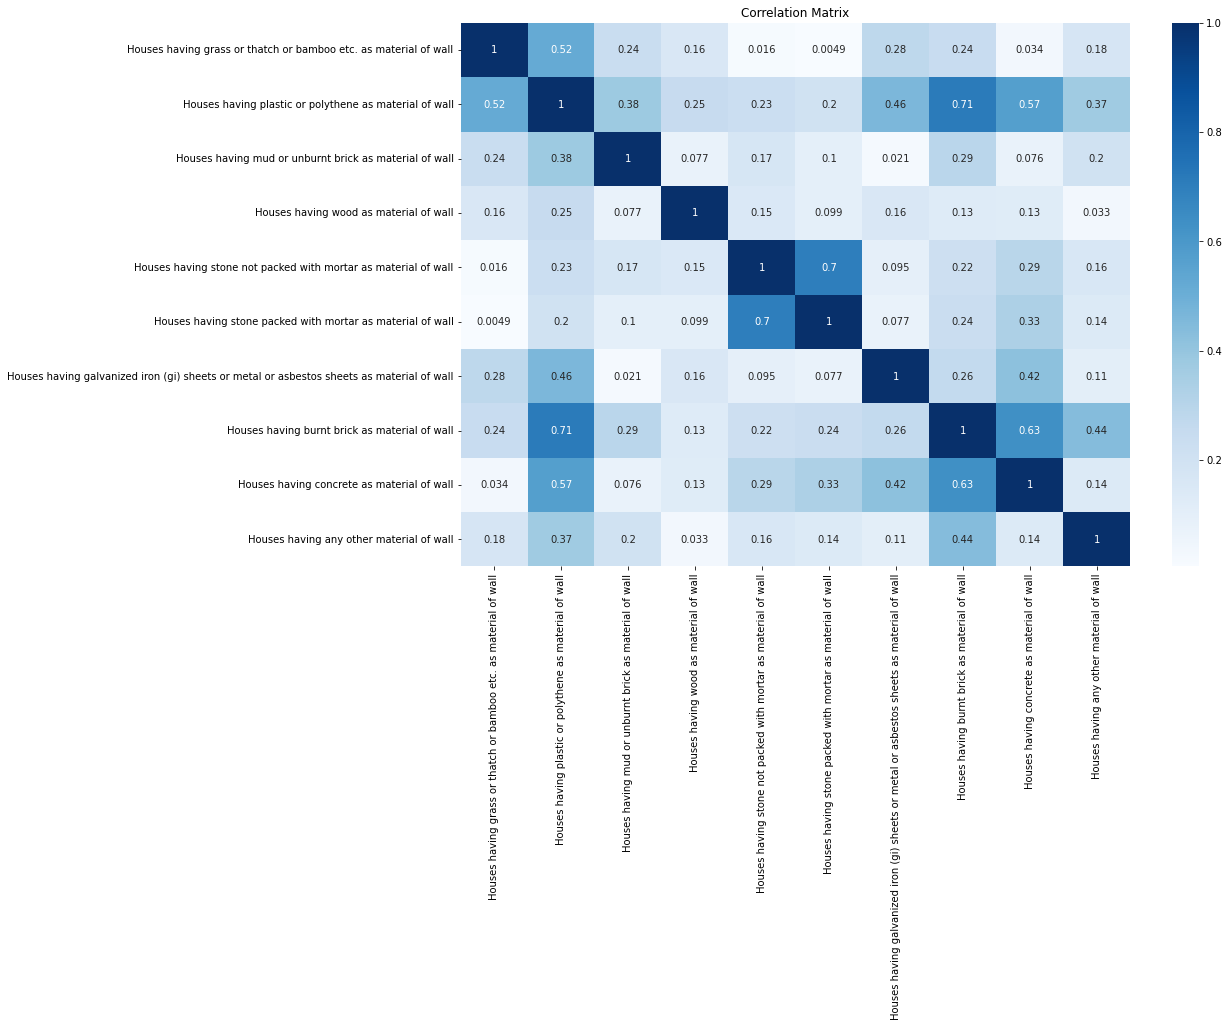

In [19]:
#Question 10:
#We have to draw Correlation Matrix for Columns J through S
#Using Seaborn function heatmap to draw Correlation Matrix using Pearson Formula
cd1=cd.drop(cd.columns[:9], axis=1)
fig = plt.figure(figsize=(15,10))
sns.heatmap(cd1.corr(method='pearson'), annot = True, cmap="Blues")
plt.title("Correlation Matrix")

<Figure size 1800x1800 with 0 Axes>

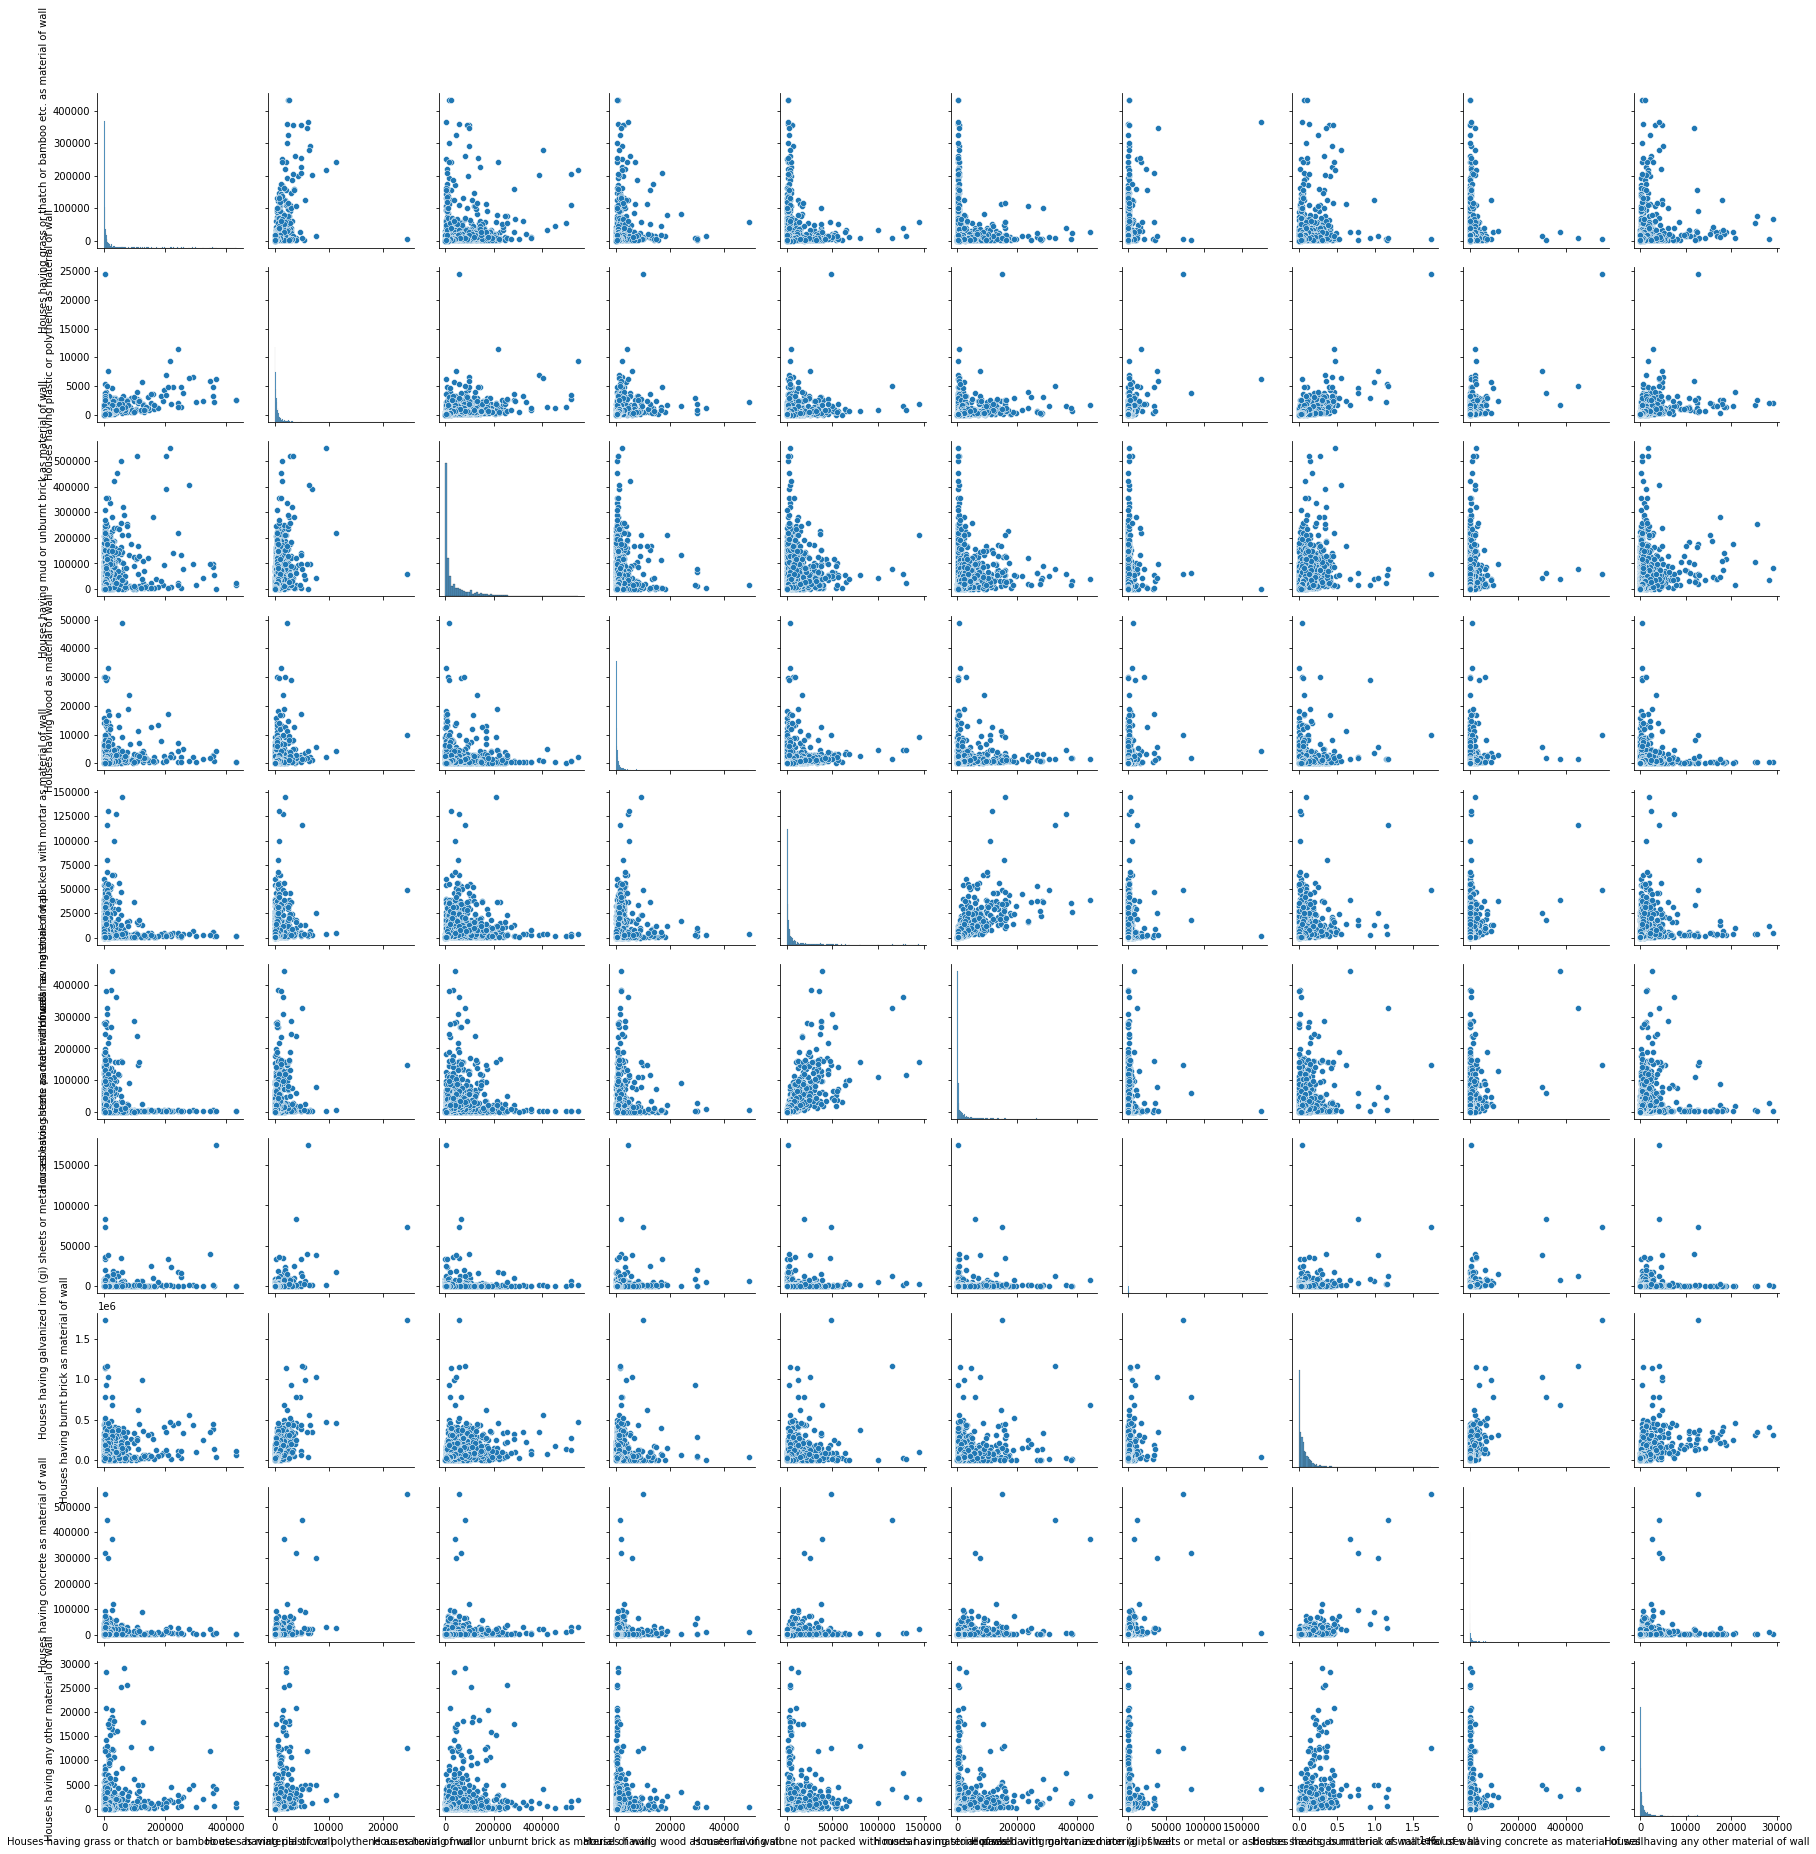

In [20]:
#Question 10:
#To draw a pairwise scatter plot for all relevant columns
#Using pair plot function of Seaborn lib to draw pairwise Scatter plot
plt.figure(figsize=(25,25))
sns.pairplot(cd1)

In [1]:
#Question 11:
'''
Here aim is to get the sum of values in all rows in a list and checking if the difference
with value in column"Number of census houses" is very very small.
If the difference is very small then we can say the values are same otherwise not same.
Ideally the all the values should be same but as we shall see, there will be quite few abnormalities
in the data so the values would not be same
'''
a = [0 for i in cd['Rowid']]  
#print(float(cd['Rowid'][0]))
cols = list(df.columns.values)[9:] #Making a list of all column values from index 9 through 19

for i in range(len(a)):  #A double loop so as to go through all the values in a row and taking its sum
    for col in cols:
        try:
            a[i] += float(cd[col][i])
        except:
            pass
c=[] #Empty lists to store required values later on
d=[]
b= cd['Number of census houses'].tolist() #Converting Column K to a list
for i in range(len(a)):
    c.append(float(b[i])-a[i]) #Method to enter the difference in an empty list

'''
The below block of code is for easy understanding for answering this question
it will generate a list which would be 'Yes' if the values are same otherwise 'no'
And this list will be added into a new dataframe.
'''
for i in range(len(c)):
    if c[i]<1 and c[i]>=0: #Condition for small positive difference
        d.append('Yes')
    elif c[i]<0 and c[i]>-1: #Condition for small negative  difference
        d.append('Yes')
    else:
        d.append('No')

dict = {'Sum of columns J through S':a, 'Column I for rows':b,'Is Value Same?':d}  #Creating a dictionary appending all lists
dt = pd.DataFrame(dict) #Creating a dataframe from above dictionary
dt



NameError: name 'cd' is not defined

In [22]:
#Question 12:

cd3=cd #creating a copy of existing dataframe
ch = 'J' #variable which will be used indexing new columns
for i in range(9,19):
    cd3['NewCol '+str(ch)]=cd3.iloc[:,i]/cd3['Number of census houses']*100 #adding new columns based on given conditions in question
    ch = chr(ord(ch) + 1) #incrementing the ch variable
    
cd3

C:\Users\alauk\AppData\Local\Temp\ipykernel_23996\1510846342.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd3['NewCol '+str(ch)]=cd3.iloc[:,i]/cd3['Number of census houses']*100 #adding new columns based on given conditions in question
C:\Users\alauk\AppData\Local\Temp\ipykernel_23996\1510846342.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd3['NewCol '+str(ch)]=cd3.iloc[:,i]/cd3['Number of census houses']*100 #adding new columns based on given conditions in question
C:\Users\alauk\AppData\Loc

,Rowid,Country,State lgd code,State,District lgd code,District,Year,Type of residence namely rural or urban,Number of census houses,Houses having grass or thatch or bamboo etc. as material of wall,...,NewCol J,NewCol K,NewCol L,NewCol M,NewCol N,NewCol O,NewCol P,NewCol Q,NewCol R,NewCol S
0,1,India,1,Jammu And Kashmir,1,Anantnag,2011,Rural,109465.00000,270.00000,...,0.246654,1.215914,20.746357,2.753391,2.771662,0.438496,0.209199,69.637784,1.278948,0.701594
1,2,India,1,Jammu And Kashmir,1,Anantnag,2011,Urban,33522.00000,69.00000,...,0.205835,0.360957,20.306068,0.366923,0.799475,0.277430,0.292345,70.965336,5.650021,0.775610
2,3,India,1,Jammu And Kashmir,2,Budgam,2011,Rural,85561.57321,134.18227,...,0.156825,0.197484,8.384931,1.122173,0.874737,0.357794,0.250921,85.718435,1.184903,1.751798
3,4,India,1,Jammu And Kashmir,2,Budgam,2011,Urban,13136.00000,49.00000,...,0.373021,0.205542,7.117844,0.182704,1.423569,0.228380,0.296894,86.000305,3.456151,0.715591
4,5,India,1,Jammu And Kashmir,3,Baramulla,2011,Rural,120312.42680,410.81773,...,0.341459,0.143817,15.964869,2.682891,10.433304,4.554696,1.446491,60.415171,1.760565,2.256736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,1469,India,38,The Dadra And Nagar Haveli And Daman And Diu,463,Daman,2011,Urban,42352.00000,202.00000,...,0.476955,0.354175,1.005856,0.224311,0.170004,0.436815,0.306951,92.463166,4.549962,0.011806
1469,1470,India,38,The Dadra And Nagar Haveli And Daman And Diu,464,Diu,2011,Rural,5410.00000,6.00000,...,0.110906,0.000000,0.924214,0.036969,4.399261,94.158965,0.000000,0.036969,0.092421,0.240296
1470,1471,India,38,The Dadra And Nagar Haveli And Daman And Diu,464,Diu,2011,Urban,5279.00000,11.00000,...,0.208373,0.018943,0.113658,0.000000,3.125592,91.305171,0.208373,2.784618,2.197386,0.037886
1471,1472,India,38,The Dadra And Nagar Haveli And Daman And Diu,465,Dadra And Nagar Haveli,2011,Rural,35408.00000,16428.00000,...,46.396295,0.175102,13.948825,0.409512,0.319137,0.208992,0.271125,35.703796,2.533326,0.033891


In [23]:
cd4=cd3.drop(cd.columns[:19], axis=1) #dropping existing columns and creating a new dataframe which consists only Newly created columns
cd4

,NewCol J,NewCol K,NewCol L,NewCol M,NewCol N,NewCol O,NewCol P,NewCol Q,NewCol R,NewCol S
0,0.246654,1.215914,20.746357,2.753391,2.771662,0.438496,0.209199,69.637784,1.278948,0.701594
1,0.205835,0.360957,20.306068,0.366923,0.799475,0.277430,0.292345,70.965336,5.650021,0.775610
2,0.156825,0.197484,8.384931,1.122173,0.874737,0.357794,0.250921,85.718435,1.184903,1.751798
3,0.373021,0.205542,7.117844,0.182704,1.423569,0.228380,0.296894,86.000305,3.456151,0.715591
4,0.341459,0.143817,15.964869,2.682891,10.433304,4.554696,1.446491,60.415171,1.760565,2.256736
...,...,...,...,...,...,...,...,...,...,...
1468,0.476955,0.354175,1.005856,0.224311,0.170004,0.436815,0.306951,92.463166,4.549962,0.011806
1469,0.110906,0.000000,0.924214,0.036969,4.399261,94.158965,0.000000,0.036969,0.092421,0.240296
1470,0.208373,0.018943,0.113658,0.000000,3.125592,91.305171,0.208373,2.784618,2.197386,0.037886
1471,46.396295,0.175102,13.948825,0.409512,0.319137,0.208992,0.271125,35.703796,2.533326,0.033891


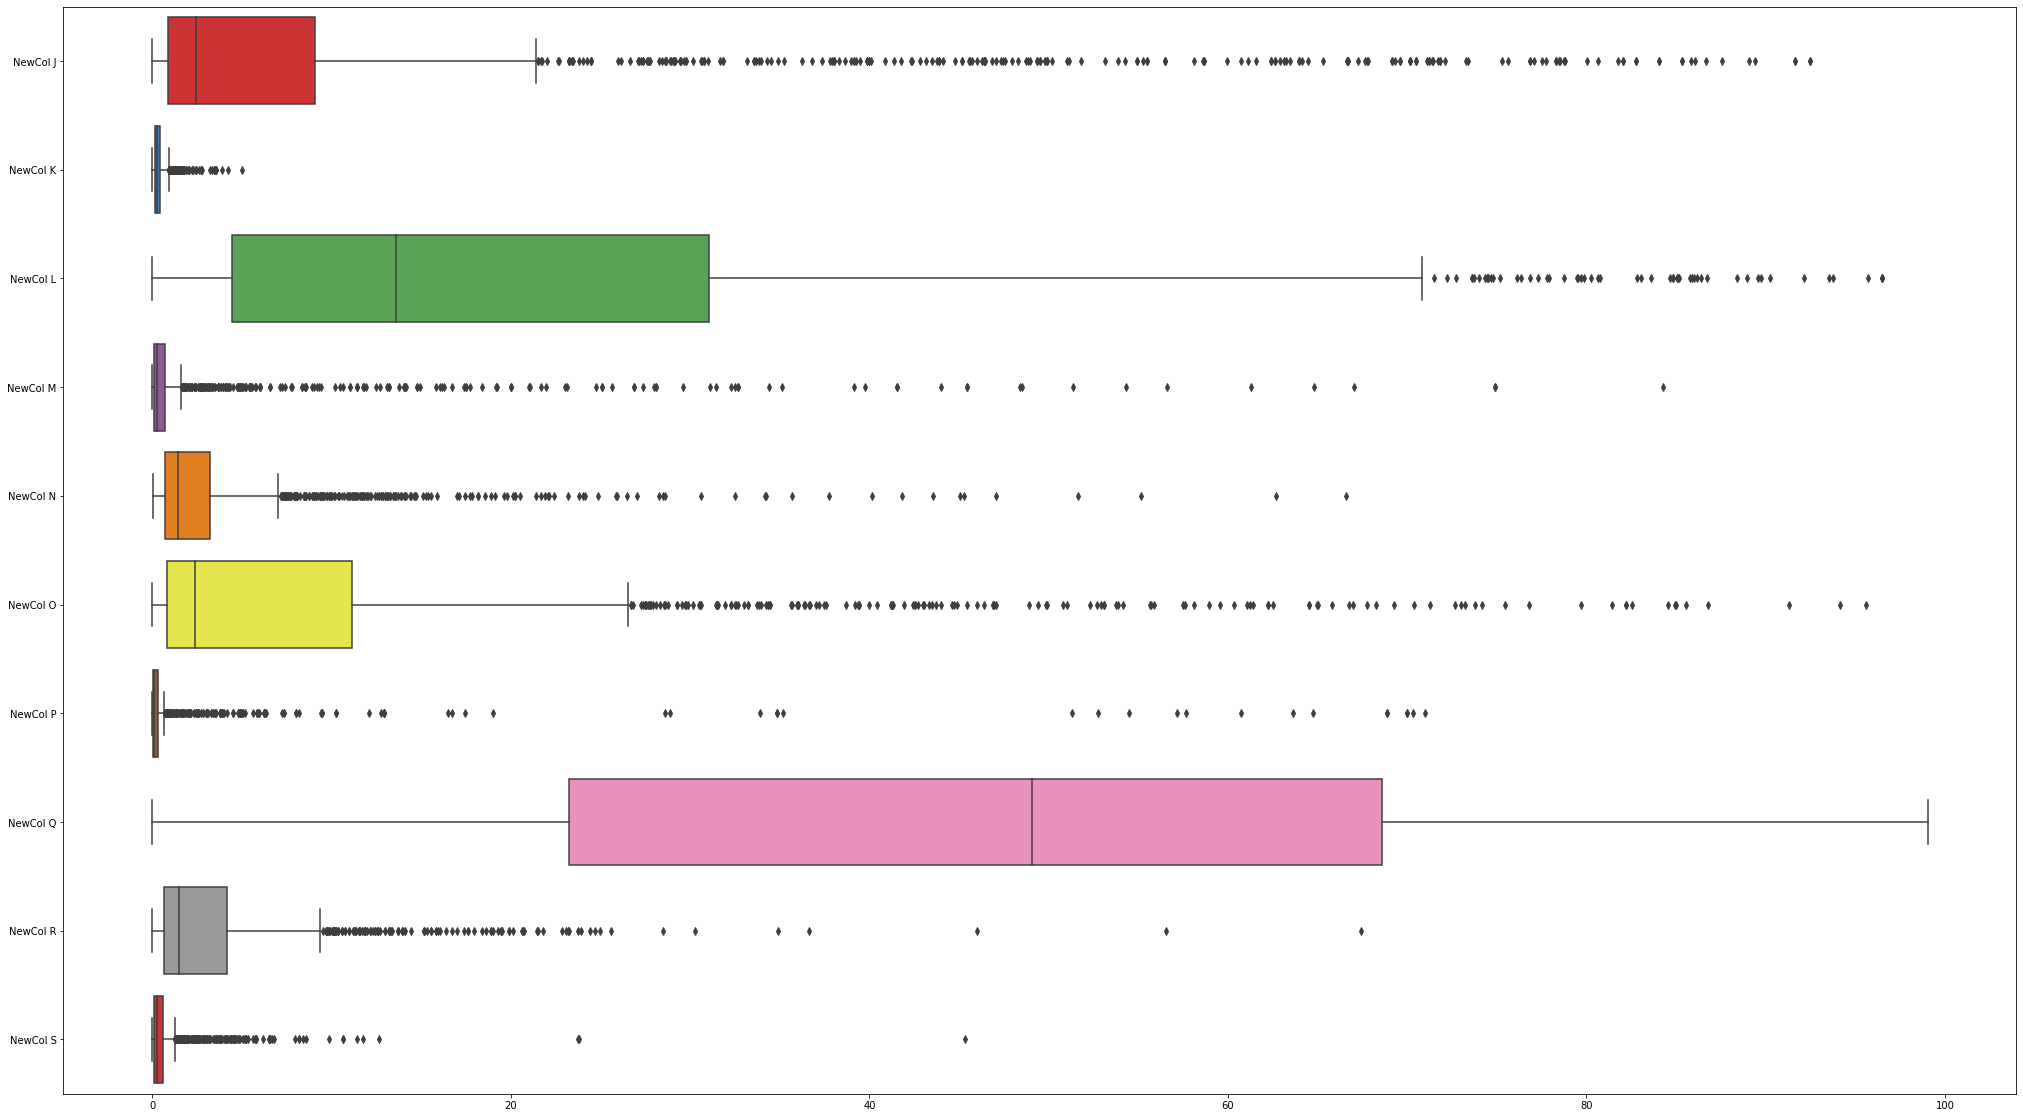

In [24]:
#Question 13:
#Drawing a box and whisker plot for each column dataframe
plt.figure(figsize=(35,20))
ax = sns.boxplot(data=cd4, orient="h", palette="Set1") #orient is used to fix horizontal orientation and pallete is used for colors 

In [2]:
#Question 14:
cd3_rural = cd3[cd3['Type of residence namely rural or urban']=='Rural'] 
#Here cd3_rural is a dataframe which consists of only values which are in Rural areas
cd4_rural=cd3_rural.drop(cd3_rural.columns[:19], axis=1)
#keeping only new columns and dropping those which are not required
#repeating the same for urban areas
cd3_urban = cd3[cd3['Type of residence namely rural or urban']=='Urban']  
cd4_urban=cd3_urban.drop(cd3_urban.columns[:19], axis=1)
ch = 'J'
for i in range(0,10): #Using a loop to print pair of columns comparing their rural and urban values side by side
    Rural=cd4_rural.loc[:,"NewCol "+str(ch)] #dataframe of rural values of a column
    Urban=cd4_urban.loc[:,"NewCol "+str(ch)]#dataframe of urban values of a column
    zipped = list(zip(Rural,Urban))         #using a zip function to combine both rural and urban values and making a new dataframe from it
    cdrvsu = pd.DataFrame(zipped, columns=['Rural','Urban'])
    plt.figure(figsize=(10,7))
    ax = sns.boxplot(data=cdrvsu, orient="h", palette="Set1")  #Drawing a box and whisker plot for each column dataframe
    plt.title("NewCol "+str(ch),fontsize=20)
    plt.show()
    ch = chr(ord(ch) + 1)

NameError: name 'cd3' is not defined

Text(0.5, 1.0, 'Correlation Matrix')

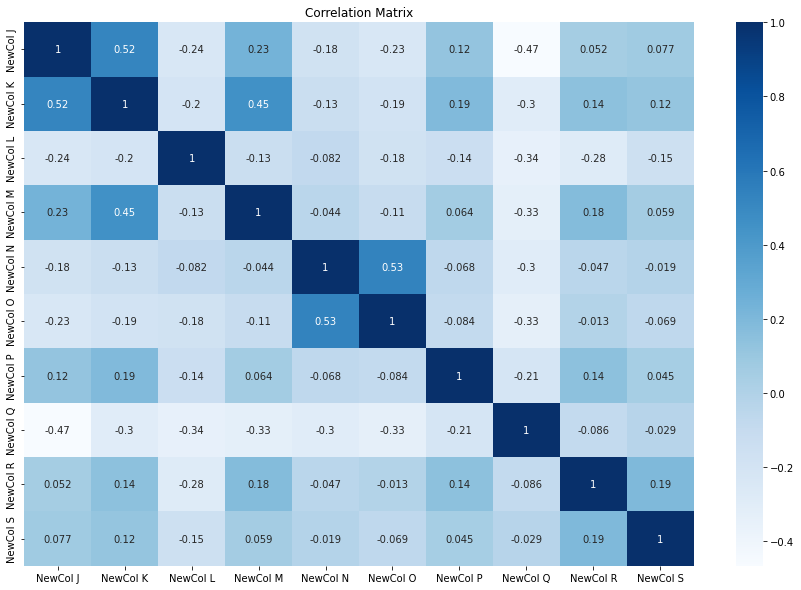

In [26]:
#Question 15:
#Using Seaborn function heatmap to draw Correlation Matrix using Pearson Formula
fig = plt.figure(figsize=(15,10))
sns.heatmap(cd4.corr(method='pearson'), annot = True, cmap="Blues")
plt.title("Correlation Matrix")

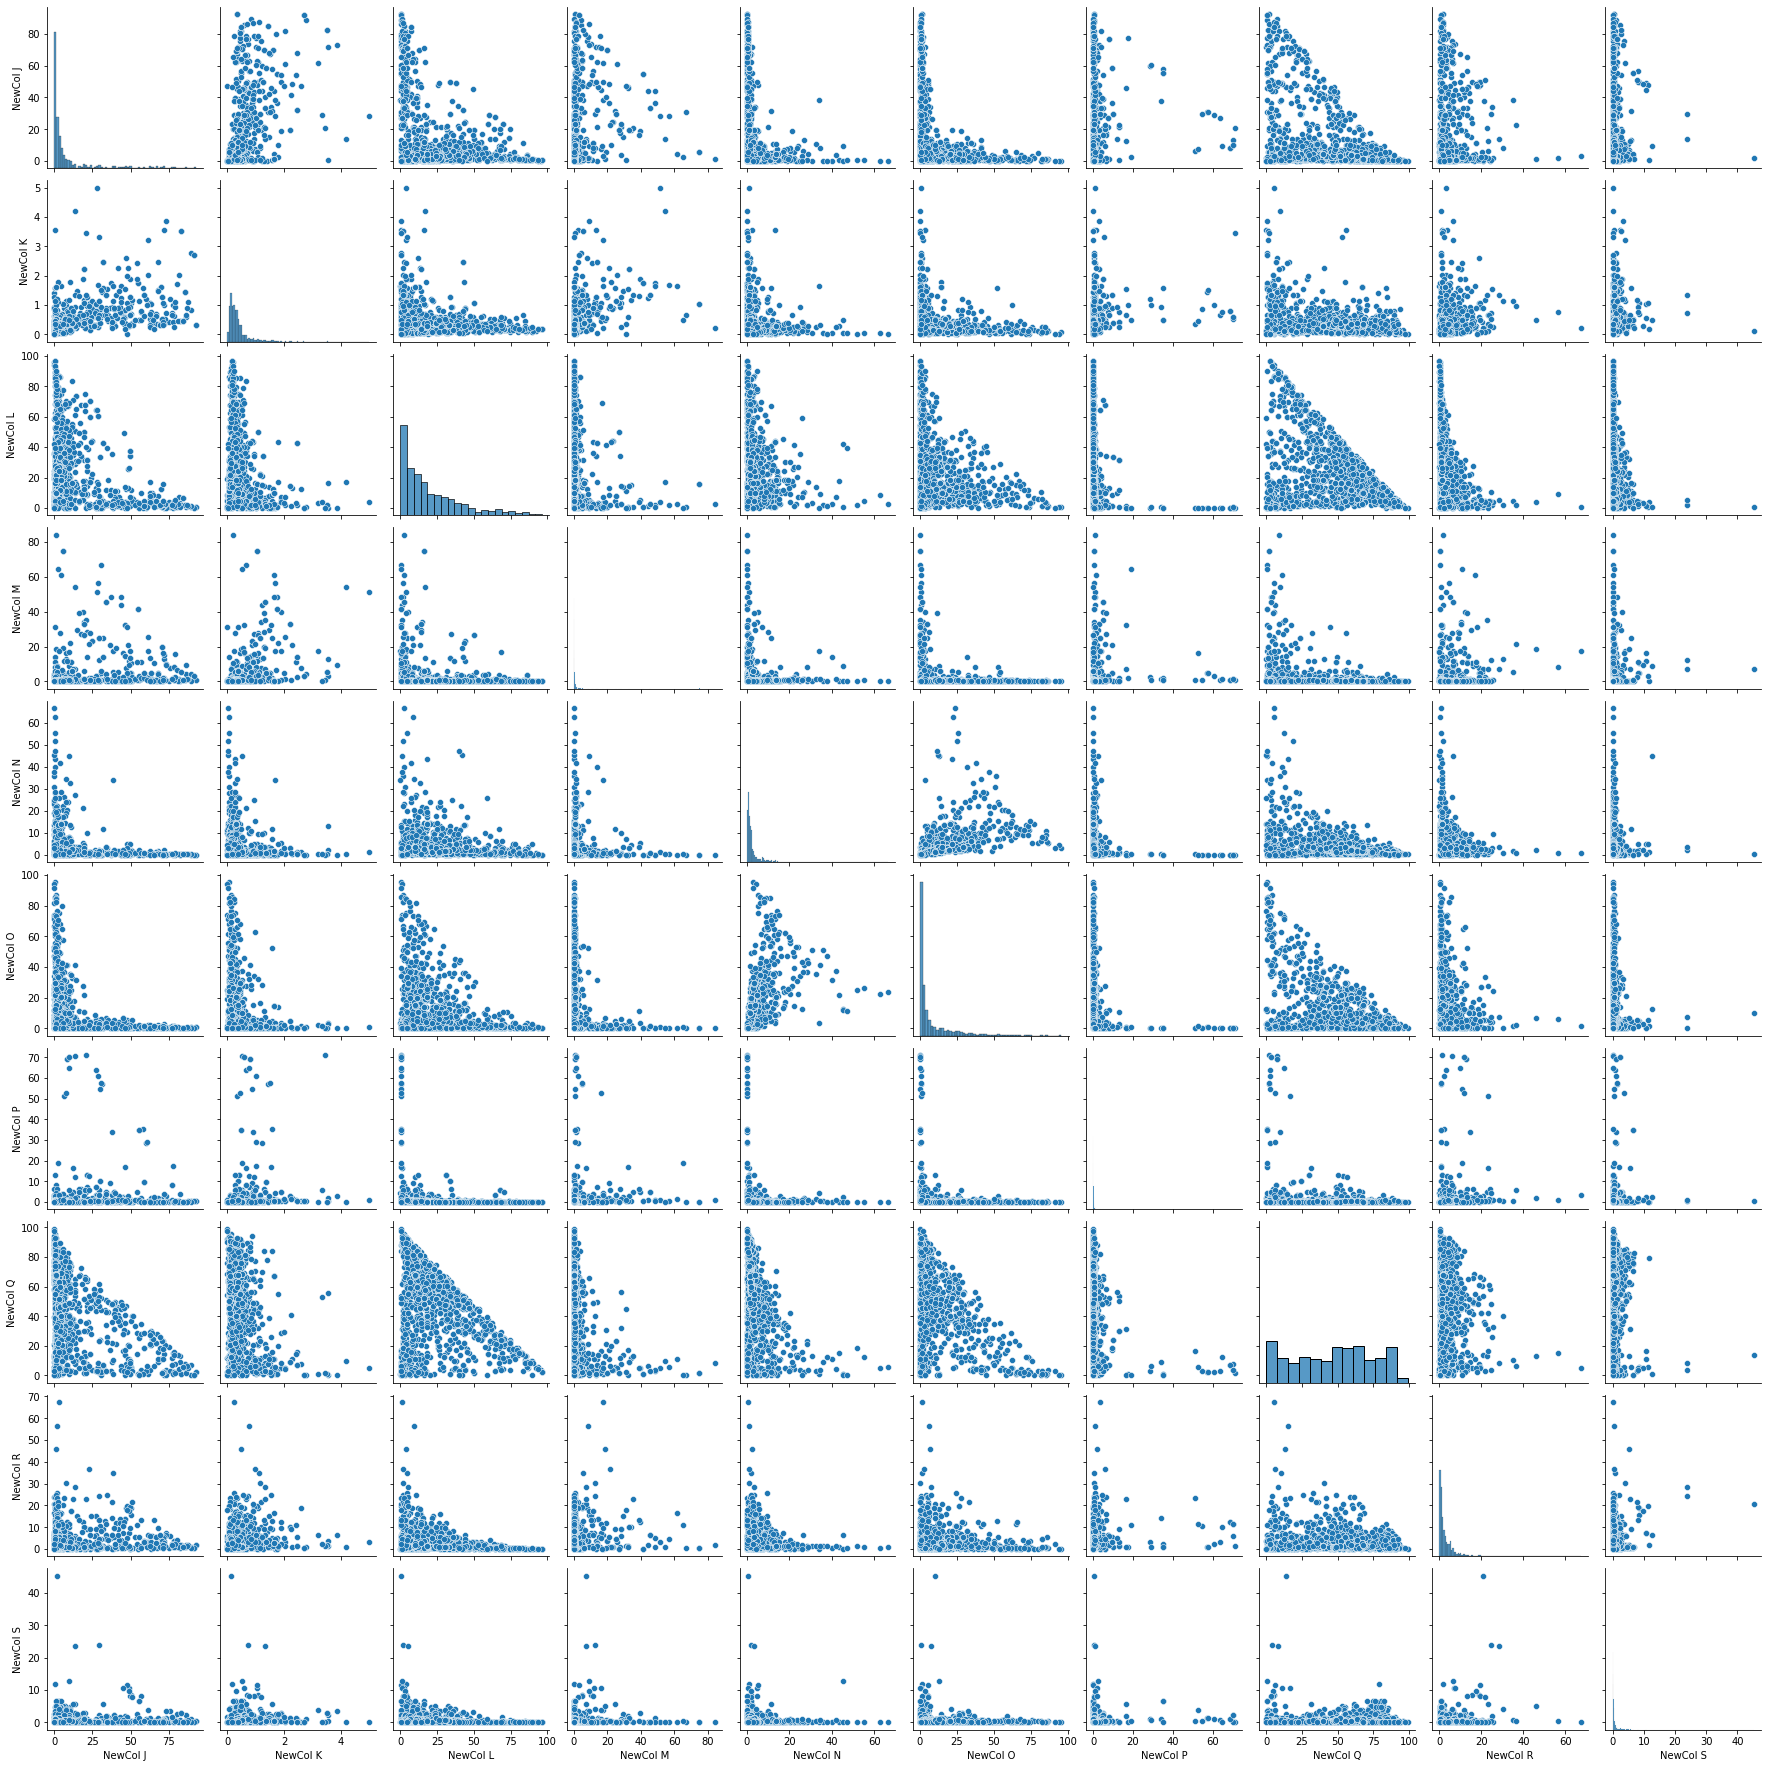

In [27]:
#Question 15:
#Using pair plot function of Seaborn lib to draw pairwise Scatter plot
fig.set_size_inches(35,35) #To set the size of window
sns.pairplot(cd4)  #Command to get the Pair-wise scatter plots

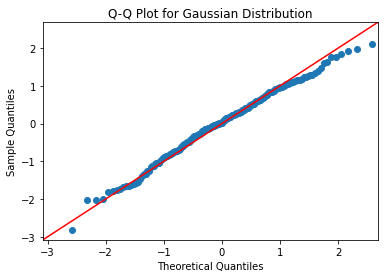

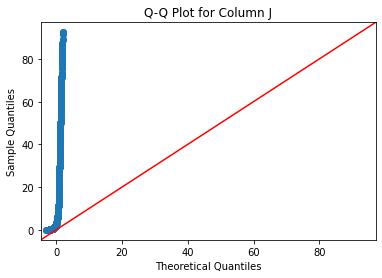

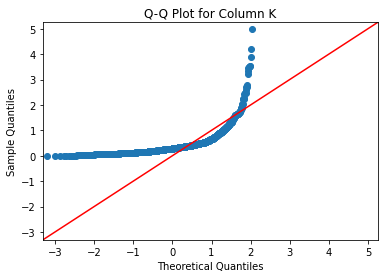

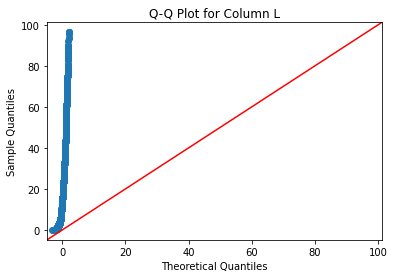

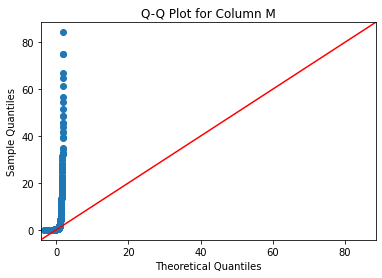

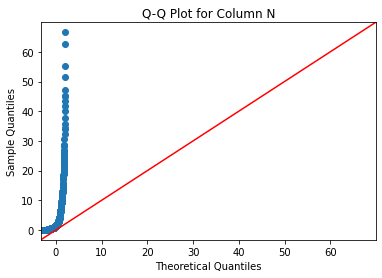

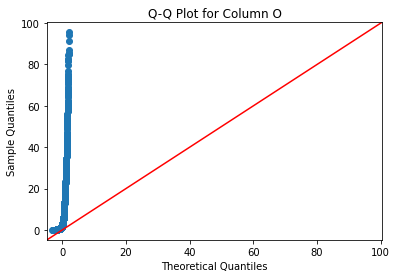

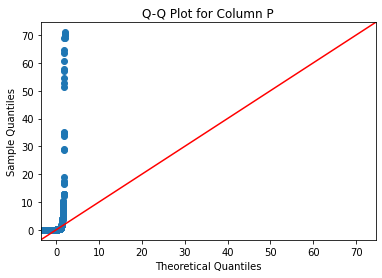

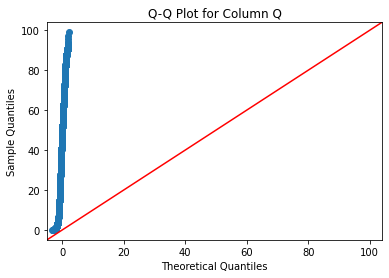

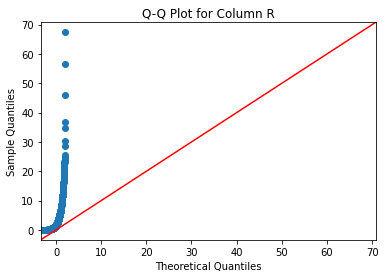

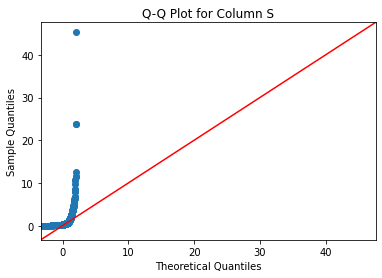

In [32]:
#Question: 16
a = np.random.normal(0, 1, 200) #Generating a numpy array for a Gaussian Distribution for comparison
sm.qqplot(a,line='45') #Seaborn command to generate Q-Q Plot
plt.title("Q-Q Plot for Gaussian Distribution")

ch = 'J'


for i in range(9,19): #Using a loop to generate Q-Q Plot for every column
    b=cd4['NewCol '+str(ch)].to_numpy()
    sm.qqplot(b,line='45')
    
    
    
    plt.title("Q-Q Plot for Column "+str(ch))
    ch = chr(ord(ch) + 1)
    plt.show()

In [29]:
#Additional EDA
#To get some basic statistical information about our dataset
cd6.info() #Basic information

cd6.describe() #Describe the data



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468 entries, 0 to 1472
Data columns (total 11 columns):
 #   Column                                                                                     Non-Null Count  Dtype  
---  ------                                                                                     --------------  -----  
 0   Number of census houses                                                                    1468 non-null   float64
 1   Houses having grass or thatch or bamboo etc. as material of wall                           1468 non-null   float64
 2   Houses having plastic or polythene as material of wall                                     1468 non-null   float64
 3   Houses having mud or unburnt brick as material of wall                                     1468 non-null   float64
 4   Houses having wood as material of wall                                                     1468 non-null   float64
 5   Houses having stone not packed with mortar as ma

,Number of census houses,Houses having grass or thatch or bamboo etc. as material of wall,Houses having plastic or polythene as material of wall,Houses having mud or unburnt brick as material of wall,Houses having wood as material of wall,Houses having stone not packed with mortar as material of wall,Houses having stone packed with mortar as material of wall,Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall,Houses having burnt brick as material of wall,Houses having concrete as material of wall,Houses having any other material of wall
count,1.468000e+03,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1.468000e+03,1468.000000,1468.000000
mean,1.680792e+05,15061.640327,560.340599,39820.555858,1154.416213,5636.772480,18082.029292,980.440054,7.988334e+04,5868.878747,1030.762943
std,2.116899e+05,42924.473841,1103.948162,64822.126645,3088.557789,11981.207068,43416.845615,6128.176773,1.244314e+05,25582.061687,2699.275576
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,2.994867e+04,558.750000,88.000000,2589.000000,77.000000,339.500000,438.000000,35.034770,9.207000e+03,341.977560,65.485696
50%,1.013566e+05,2278.500000,232.699414,11024.591495,267.000000,1440.500000,2261.500000,116.484145,4.008900e+04,1244.106468,219.772274
75%,2.342925e+05,9712.378055,595.000000,50640.152233,888.510910,4891.500000,13210.206830,344.355951,1.016584e+05,4044.000000,764.750000
max,2.665481e+06,434440.000000,24474.000000,550577.000000,48945.621080,145200.000000,444389.779000,174598.000000,1.736398e+06,550734.000000,29040.000000


Text(0, 0.5, 'Sample Number')

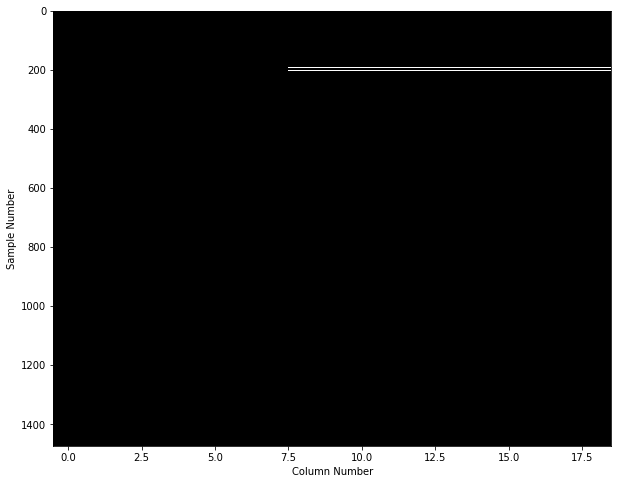

In [30]:
#Image plot to highlight the missing values
plt.figure(figsize=(10, 8))
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")

In [31]:
'''References:
1. https://www.w3schools.com/python/pandas/pandas_analyzing.asp
2. https://www.geeksforgeeks.org/getting-unique-values-from-a-column-in-pandas-dataframe/
3. https://datascienceparichay.com/article/pandas-count-missing-values-in-each-column/
4. https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
5. https://stackoverflow.com/questions/68779621/the-names-on-x-label-in-the-histogram-are-cut-out
6. https://stackoverflow.com/questions/12444716/how-do-i-set-the-figure-title-and-axes-labels-font-size-in-matplotlib
7. https://stackoverflow.com/questions/26700598/matplotlib-showing-x-tick-labels-overlapping
8. https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
9. https://stackoverflow.com/questions/30059260/python-pandas-counting-the-number-of-missing-nan-in-each-row
10.https://monkeylearn.com/blog/data-cleaning-python/
11.https://medium.com/geekculture/how-to-find-the-correlation-between-continuous-variables-and-visualise-it-using-python-7faf5b028ae0
12.https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-lists/
13.https://www.geeksforgeeks.org/data-visualization-with-pairplot-seaborn-and-pandas/
14.https://www.geeksforgeeks.org/ways-increment-character-python/
15.https://desktop.arcgis.com/en/arcmap/latest/extensions/geostatistical-analyst/normal-qq-plot-and-general-qq-plot.htm
16.https://www.geeksforgeeks.org/qqplot-quantile-quantile-plot-in-python/
17.https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/
18.https://miykael.github.io/blog/2022/advanced_eda/
19.https://www.ibm.com/cloud/learn/exploratory-data-analysis
'''

'References:\n1. https://www.w3schools.com/python/pandas/pandas_analyzing.asp\n2. https://www.geeksforgeeks.org/getting-unique-values-from-a-column-in-pandas-dataframe/\n3. https://datascienceparichay.com/article/pandas-count-missing-values-in-each-column/\n4. https://www.geeksforgeeks.org/bar-plot-in-matplotlib/\n5. https://stackoverflow.com/questions/68779621/the-names-on-x-label-in-the-histogram-are-cut-out\n6. https://stackoverflow.com/questions/12444716/how-do-i-set-the-figure-title-and-axes-labels-font-size-in-matplotlib\n7. https://stackoverflow.com/questions/26700598/matplotlib-showing-x-tick-labels-overlapping\n8. https://www.geeksforgeeks.org/bar-plot-in-matplotlib/\n9. https://stackoverflow.com/questions/30059260/python-pandas-counting-the-number-of-missing-nan-in-each-row\n10.https://monkeylearn.com/blog/data-cleaning-python/\n11.https://medium.com/geekculture/how-to-find-the-correlation-between-continuous-variables-and-visualise-it-using-python-7faf5b028ae0\n12.https://www